# Modeling

In [1]:
# load libraries

import numpy as np
import pandas as pd
import geopandas as gpd

from matplotlib import pyplot as plt
%matplotlib inline
import altair as alt

from sklearn.cluster import KMeans, dbscan 
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
plt.rcParams['figure.figsize'] = (10,6)

alt.renderers.enable("notebook")
np.random.seed(42)

In [3]:
path_data = './data/data_101219.geojson'

data = gpd.read_file(path_data)

### Aqueduct attributes for clustering

Baseline water stress: bws_raw  
Baseline water depletion: bwd_raw  
Interannual variability: iav_raw  
Seasonal variability: sev_raw  
Groundwater table decline: gtd_raw  
Riverine flood risk: rfr_raw  
Coastal flood risk: cfr_raw  
Drought risk: drr_raw  
Untreated connected wastewater: ucw_raw  
Unimproved/no drinking water: udw_raw  
Unimproved/no sanitation: usa_raw  

In [4]:
pd.set_option('display.max_columns', None)
data.head(1)

,string_id,bws_raw,bwd_raw,iav_raw,sev_raw,gtd_raw,rfr_raw,cfr_raw,drr_raw,ucw_raw,udw_raw,usa_raw,mean_infant_mort,mean_light,pop_density,geometry
0,111011-EGY.11_1-3365,2.318042,0.987061,1.035414,0.962396,0.843958,0.074383,0.0,NaN,0.6139,0.01057,0.023176,34.693151,2.522154,0.0,(POLYGON ((31.90590570688292 29.85788702426048...


# Create Pipeline

1. Imputation option for missing data: https://scikit-learn.org/stable/modules/impute.html
1. Standard scaler
1. kmeans
1. optimize K using elbow method: https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
1. generate final clusters
1. join clusters back to original data (unscaled)
1. summarise means for each group
1. describe group typologies

In [5]:
kmeans = KMeans(n_clusters=5)

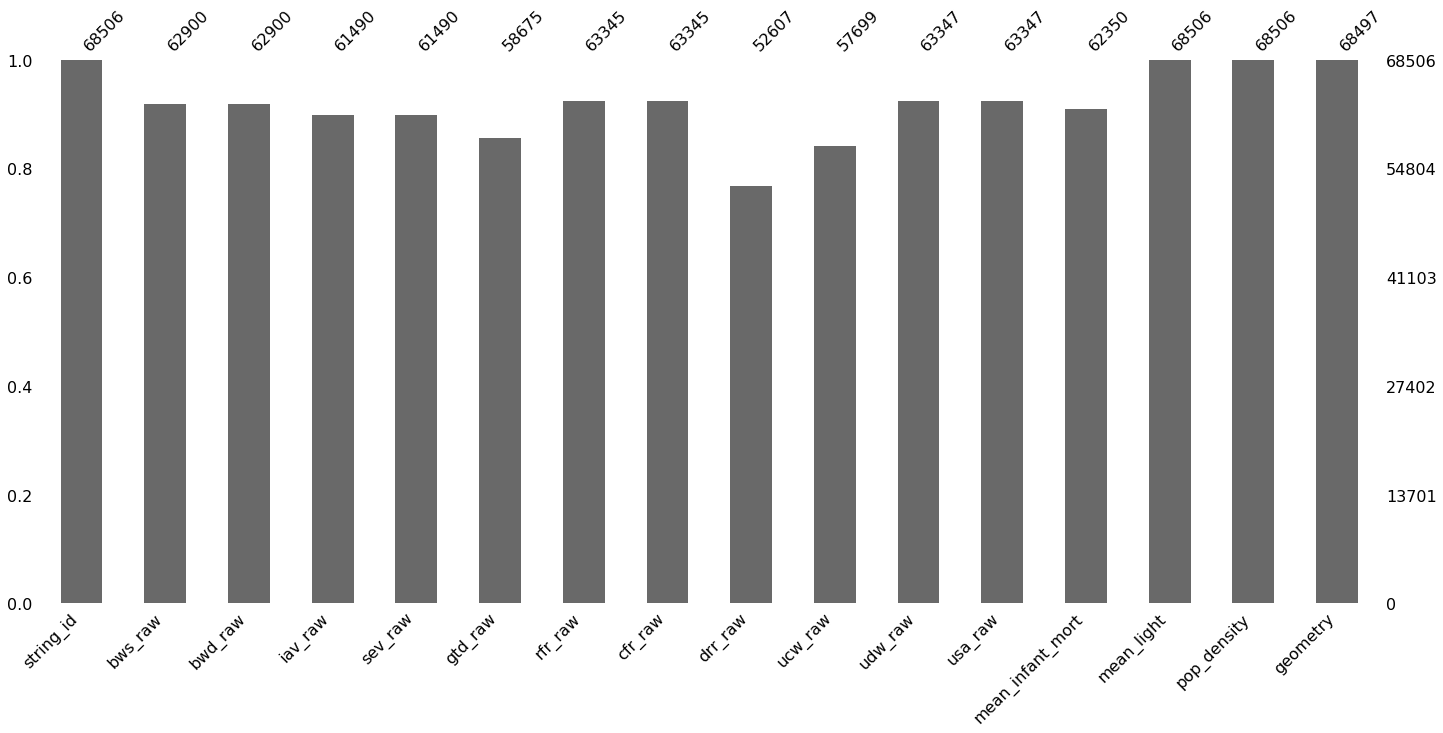

In [6]:
import missingno as msno
msno.bar(data)

## Using the iterativeimputer to fill NAs. Note: This is an experimental tool.

In [7]:
fill_NA = IterativeImputer(max_iter=10, random_state=0)

In [8]:
data_nostring = data.drop(['string_id', 'geometry'], axis=1)

In [9]:
data_nostring

,bws_raw,bwd_raw,iav_raw,sev_raw,gtd_raw,rfr_raw,cfr_raw,drr_raw,ucw_raw,udw_raw,usa_raw,mean_infant_mort,mean_light,pop_density
0,2.318042,0.987061,1.035414,0.962396,0.843958,0.074383,0.0,NaN,0.613900,0.01057,0.023176,34.693151,2.522154,0.000000
1,2.318042,0.987061,1.035414,0.962396,0.843958,0.074383,0.0,NaN,0.613900,0.01057,0.023176,14.868493,13.672038,1506.964639
2,2.318042,0.987061,1.035414,0.962396,NaN,0.074383,0.0,NaN,0.613900,0.01057,0.023176,14.868493,36.785975,12130.427165
3,2.318042,0.987061,1.035414,0.962396,0.843958,0.074383,0.0,NaN,NaN,0.01057,0.023176,14.868493,35.409092,0.000000
4,2.318042,0.987061,1.035414,0.962396,NaN,0.074383,0.0,NaN,NaN,0.01057,0.023176,14.868493,38.731335,932.199402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.995347,NaN,NaN,NaN,0.283582,0.000000
68502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.601600,NaN,NaN,NaN,0.000000,0.000000
68503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.601600,NaN,NaN,NaN,0.000000,0.000000
68504,NaN,NaN,NaN,NaN,0.000600,NaN,NaN,NaN,0.601600,NaN,NaN,NaN,0.000000,0.000000


In [10]:
fill_NA = fill_NA.fit(data_nostring)

In [11]:
imputed_DF = pd.DataFrame(fill_NA.fit_transform(data_nostring))
imputed_DF.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2.318042,0.987061,1.035414,0.962396,0.843958,0.074383,0.0,2.389308,0.6139,0.01057,0.023176,34.693151,2.522154,0.0


In [12]:
imputed_DF.shape

(68506, 14)

In [13]:
col_names = list(data_nostring.columns)
col_names

['bws_raw',
 'bwd_raw',
 'iav_raw',
 'sev_raw',
 'gtd_raw',
 'rfr_raw',
 'cfr_raw',
 'drr_raw',
 'ucw_raw',
 'udw_raw',
 'usa_raw',
 'mean_infant_mort',
 'mean_light',
 'pop_density']

In [14]:
imputed_DF.columns = col_names
imputed_DF

,bws_raw,bwd_raw,iav_raw,sev_raw,gtd_raw,rfr_raw,cfr_raw,drr_raw,ucw_raw,udw_raw,usa_raw,mean_infant_mort,mean_light,pop_density
0,2.318042,0.987061,1.035414,0.962396,0.843958,0.074383,0.000000,2.389308,0.613900,0.010570,0.023176,34.693151,2.522154,0.000000
1,2.318042,0.987061,1.035414,0.962396,0.843958,0.074383,0.000000,2.405378,0.613900,0.010570,0.023176,14.868493,13.672038,1506.964639
2,2.318042,0.987061,1.035414,0.962396,0.595716,0.074383,0.000000,2.765756,0.613900,0.010570,0.023176,14.868493,36.785975,12130.427165
3,2.318042,0.987061,1.035414,0.962396,0.843958,0.074383,0.000000,2.739219,0.349931,0.010570,0.023176,14.868493,35.409092,0.000000
4,2.318042,0.987061,1.035414,0.962396,0.570087,0.074383,0.000000,2.755900,0.336348,0.010570,0.023176,14.868493,38.731335,932.199402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68501,0.263783,0.183694,0.623765,0.710186,0.114734,0.009384,0.000743,2.263799,0.995347,0.099246,0.234813,19.450593,0.283582,0.000000
68502,0.263844,0.199067,0.613915,0.691059,0.086624,0.009516,0.000681,2.223124,0.601600,0.105343,0.227844,20.762890,0.000000,0.000000
68503,0.263844,0.199067,0.613915,0.691059,0.086624,0.009516,0.000681,2.223124,0.601600,0.105343,0.227844,20.762890,0.000000,0.000000
68504,0.263836,0.198916,0.613931,0.690648,0.000600,0.009529,0.000677,2.216331,0.601600,0.105252,0.227229,20.707165,0.000000,0.000000


## Physical Risk Variables cluster

In [15]:
physical_risk_cols = ['ucw_raw', 'udw_raw', 'usa_raw', 'mean_infant_mort', 'mean_light', 'pop_density']
physical_risk = imputed_DF[physical_risk_cols].copy()
physical_risk.head()

,ucw_raw,udw_raw,usa_raw,mean_infant_mort,mean_light,pop_density
0,0.613900,0.01057,0.023176,34.693151,2.522154,0.000000
1,0.613900,0.01057,0.023176,14.868493,13.672038,1506.964639
2,0.613900,0.01057,0.023176,14.868493,36.785975,12130.427165
3,0.349931,0.01057,0.023176,14.868493,35.409092,0.000000
4,0.336348,0.01057,0.023176,14.868493,38.731335,932.199402


In [16]:
scaler = StandardScaler()

In [17]:
physical_risk_scaled = scaler.fit_transform(physical_risk)
physical_risk_scaled

array([[ 0.33189974, -0.6223355 , -0.75911379,  0.6309712 , -0.07425985,
        -0.11562843],
       [ 0.33189974, -0.6223355 , -0.75911379, -0.29184516,  1.23082481,
         0.02767885],
       [ 0.33189974, -0.6223355 , -0.75911379, -0.29184516,  3.93629174,
         1.03793449],
       ...,
       [ 0.31273579, -0.00779948,  0.02388803, -0.01746737, -0.36947586,
        -0.11562843],
       [ 0.31273579, -0.00838594,  0.02153729, -0.0200613 , -0.36947586,
        -0.11562843],
       [ 0.31273579, -0.00779948,  0.02388803, -0.01746737, -0.36947586,
        -0.11562843]])

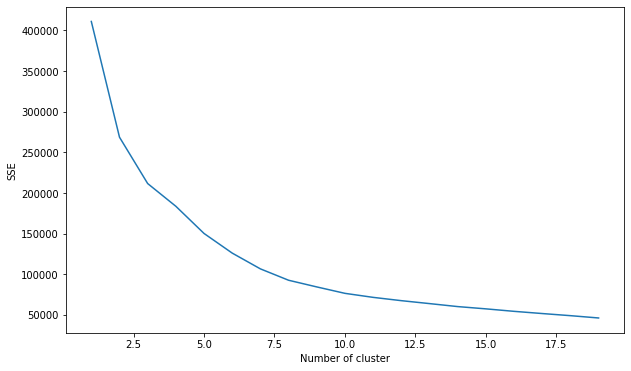

In [33]:
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(physical_risk_scaled)
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Sum of squared distance to clusters")
plt.show()

In [34]:
kmeans = KMeans(n_clusters = 10)
kmeans.fit(physical_risk_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
data['PR_labels'] = kmeans.labels_
data.head(1)

,string_id,bws_raw,bwd_raw,iav_raw,sev_raw,gtd_raw,rfr_raw,cfr_raw,drr_raw,ucw_raw,udw_raw,usa_raw,mean_infant_mort,mean_light,pop_density,geometry,PR_labels,deplete_labels,floodrought_labels
0,111011-EGY.11_1-3365,2.318042,0.987061,1.035414,0.962396,0.843958,0.074383,0.0,NaN,0.6139,0.01057,0.023176,34.693151,2.522154,0.0,(POLYGON ((31.90590570688292 29.85788702426048...,1,0,2


In [36]:
data.groupby('PR_labels').size()

PR_labels
0    17642
1    27565
2     5476
3     4426
4     1405
5      127
6     2872
7     5372
8     3609
9       12
dtype: int64

## Depletion Variables cluster

In [37]:
depletion_cols = ['bws_raw', 'bwd_raw', 'iav_raw', 'sev_raw', 'gtd_raw', 'mean_infant_mort', 'mean_light', 'pop_density']
depletion_risk = imputed_DF[depletion_cols].copy()
depletion_risk.head()

,bws_raw,bwd_raw,iav_raw,sev_raw,gtd_raw,mean_infant_mort,mean_light,pop_density
0,2.318042,0.987061,1.035414,0.962396,0.843958,34.693151,2.522154,0.000000
1,2.318042,0.987061,1.035414,0.962396,0.843958,14.868493,13.672038,1506.964639
2,2.318042,0.987061,1.035414,0.962396,0.595716,14.868493,36.785975,12130.427165
3,2.318042,0.987061,1.035414,0.962396,0.843958,14.868493,35.409092,0.000000
4,2.318042,0.987061,1.035414,0.962396,0.570087,14.868493,38.731335,932.199402


In [38]:
depletion_scaled = scaler.fit_transform(depletion_risk)
depletion_scaled

array([[ 1.31986543e-01,  1.66411133e-01,  6.60268697e-01, ...,
         6.30971197e-01, -7.42598501e-02, -1.15628428e-01],
       [ 1.31986543e-01,  1.66411133e-01,  6.60268697e-01, ...,
        -2.91845162e-01,  1.23082481e+00,  2.76788525e-02],
       [ 1.31986543e-01,  1.66411133e-01,  6.60268697e-01, ...,
        -2.91845162e-01,  3.93629174e+00,  1.03793449e+00],
       ...,
       [-3.57330633e-06, -1.78025605e-04,  1.71488092e-02, ...,
        -1.74673682e-02, -3.69475860e-01, -1.15628428e-01],
       [-4.05902303e-06, -2.09956619e-04,  1.71739314e-02, ...,
        -2.00612966e-02, -3.69475860e-01, -1.15628428e-01],
       [-3.57330633e-06, -1.78025605e-04,  1.71488092e-02, ...,
        -1.74673682e-02, -3.69475860e-01, -1.15628428e-01]])

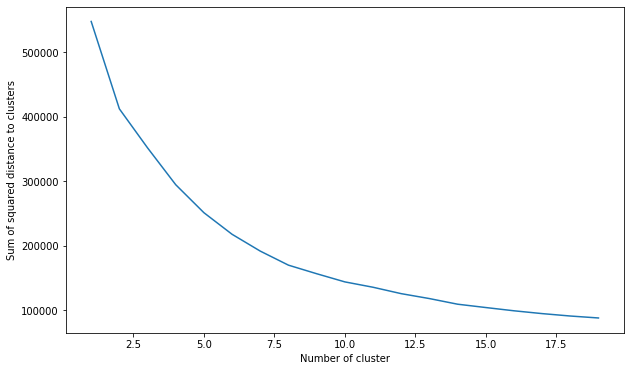

In [39]:
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(depletion_scaled)
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Sum of squared distance to clusters")
plt.show()

In [43]:
kmeans = KMeans(n_clusters = 10)
kmeans.fit(depletion_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [44]:
data['deplete_labels'] = kmeans.labels_
data.head(1)

,string_id,bws_raw,bwd_raw,iav_raw,sev_raw,gtd_raw,rfr_raw,cfr_raw,drr_raw,ucw_raw,udw_raw,usa_raw,mean_infant_mort,mean_light,pop_density,geometry,PR_labels,deplete_labels,floodrought_labels
0,111011-EGY.11_1-3365,2.318042,0.987061,1.035414,0.962396,0.843958,0.074383,0.0,NaN,0.6139,0.01057,0.023176,34.693151,2.522154,0.0,(POLYGON ((31.90590570688292 29.85788702426048...,1,0,2


In [45]:
data.groupby('deplete_labels').size()

deplete_labels
0     8185
1    25196
2        1
3     3031
4     9331
5       12
6     1292
7      140
8      440
9    20878
dtype: int64

## Flood/Drought variables cluster

In [46]:
floodrought_cols = ['rfr_raw', 'cfr_raw', 'drr_raw', 'mean_infant_mort', 'mean_light', 'pop_density']
floodrought_risk = imputed_DF[floodrought_cols].copy()
floodrought_risk.head()

,rfr_raw,cfr_raw,drr_raw,mean_infant_mort,mean_light,pop_density
0,0.074383,0.0,2.389308,34.693151,2.522154,0.000000
1,0.074383,0.0,2.405378,14.868493,13.672038,1506.964639
2,0.074383,0.0,2.765756,14.868493,36.785975,12130.427165
3,0.074383,0.0,2.739219,14.868493,35.409092,0.000000
4,0.074383,0.0,2.755900,14.868493,38.731335,932.199402


In [47]:
floodrought_scaled = scaler.fit_transform(floodrought_risk)
floodrought_scaled

array([[ 3.49160450e+00, -8.84013363e-02,  1.49193974e-01,
         6.30971197e-01, -7.42598501e-02, -1.15628428e-01],
       [ 3.49160450e+00, -8.84013363e-02,  1.67559512e-01,
        -2.91845162e-01,  1.23082481e+00,  2.76788525e-02],
       [ 3.49160450e+00, -8.84013363e-02,  5.79424742e-01,
        -2.91845162e-01,  3.93629174e+00,  1.03793449e+00],
       ...,
       [-1.27876993e-03,  7.21957076e-03, -4.07330700e-02,
        -1.74673682e-02, -3.69475860e-01, -1.15628428e-01],
       [-5.43730064e-04,  6.68967242e-03, -4.84968332e-02,
        -2.00612966e-02, -3.69475860e-01, -1.15628428e-01],
       [-1.27876993e-03,  7.21957076e-03, -4.07330700e-02,
        -1.74673682e-02, -3.69475860e-01, -1.15628428e-01]])

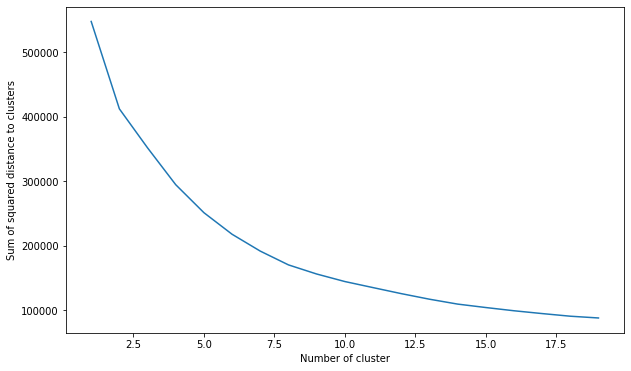

In [48]:
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(floodrought_risk)
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Sum of squared distance to clusters")
plt.show()

In [49]:
kmeans = KMeans(n_clusters = 10)
kmeans.fit(floodrought_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [50]:
data['floodrought_labels'] = kmeans.labels_
data.head(1)

,string_id,bws_raw,bwd_raw,iav_raw,sev_raw,gtd_raw,rfr_raw,cfr_raw,drr_raw,ucw_raw,udw_raw,usa_raw,mean_infant_mort,mean_light,pop_density,geometry,PR_labels,deplete_labels,floodrought_labels
0,111011-EGY.11_1-3365,2.318042,0.987061,1.035414,0.962396,0.843958,0.074383,0.0,NaN,0.6139,0.01057,0.023176,34.693151,2.522154,0.0,(POLYGON ((31.90590570688292 29.85788702426048...,1,0,4


In [51]:
data.groupby('floodrought_labels').size()

floodrought_labels
0    15823
1    10004
2      151
3     9464
4     1617
5       25
6       12
7    28218
8     2972
9      220
dtype: int64

In [31]:
data.to_file("./data/data_with_labels.geojson", driver='GeoJSON')

## Quick Viz

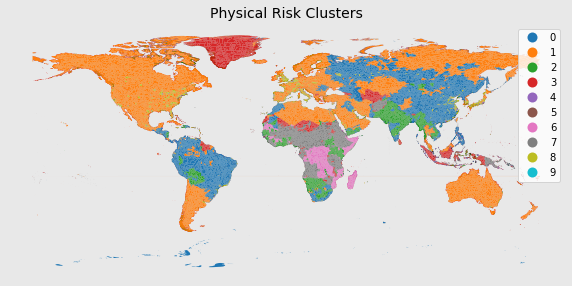

In [52]:
fig, ax = plt.subplots(figsize=(10,10), facecolor='#E8E8E8')
data.plot(ax = ax, column = 'PR_labels', legend=True, categorical = True)
ax.set_title("Physical Risk Clusters", fontsize=14)
ax.set_axis_off()

In [53]:
pr_cluster_means = data.groupby(['PR_labels'])['ucw_raw', 'udw_raw', 'usa_raw', 'mean_infant_mort', 'mean_light', 'pop_density'].mean()
pr_cluster_means.reset_index()
pr_cluster_means

,ucw_raw,udw_raw,usa_raw,mean_infant_mort,mean_light,pop_density
PR_labels,,,,,,
0,0.856189,0.091167,0.277607,15.441624,1.157886,494.560190
1,0.503820,0.012890,0.017169,8.780265,1.240495,148.206372
2,0.971325,0.196559,0.510678,46.515814,1.165319,1373.058371
3,-1.000000,0.060525,0.119602,24.930211,0.940340,655.851676
4,0.419304,0.027476,0.068559,9.225156,47.647019,14019.056743
5,0.390884,0.068715,0.173210,19.504187,50.242018,127240.813435
6,0.995973,0.536472,0.774737,63.607034,0.649981,489.162015
7,-1.000000,0.408943,0.729774,60.971500,0.695660,712.679768
8,0.477053,0.025375,0.067430,8.499426,19.818713,3408.418218


In [54]:
pr_cluster_medians = data.groupby(['PR_labels'])['ucw_raw', 'udw_raw', 'usa_raw', 'mean_infant_mort', 'mean_light', 'pop_density'].median()
pr_cluster_medians

,ucw_raw,udw_raw,usa_raw,mean_infant_mort,mean_light,pop_density
PR_labels,,,,,,
0,0.926190,0.082243,0.273275,13.887816,0.234328,17.777710
1,0.541179,0.000176,0.000952,7.075676,0.150593,0.181054
2,1.000000,0.203954,0.526101,42.535000,0.316221,123.668976
3,-1.000000,0.014770,0.019240,22.124572,0.104600,0.000000
4,0.330000,0.011943,0.006560,6.104247,46.687957,8262.286725
5,0.613900,0.026275,0.101253,9.464865,61.095753,105389.789781
6,1.000000,0.524128,0.770108,62.812063,0.296213,54.353882
7,-1.000000,0.405710,0.719941,60.199615,0.217911,69.892710
8,0.330000,0.014354,0.006637,5.935052,18.420359,1982.595726


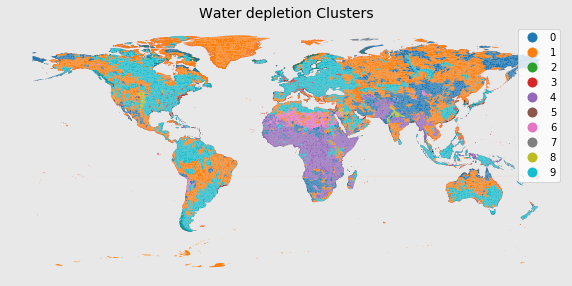

In [55]:
fig, ax = plt.subplots(figsize=(10,10), facecolor='#E8E8E8')
data.plot(ax = ax, column = 'deplete_labels', legend=True, categorical = True)
ax.set_title("Water depletion Clusters", fontsize=14)
ax.set_axis_off()

In [56]:
deplete_means = data.groupby(['deplete_labels'])['bws_raw', 'bwd_raw', 'iav_raw', 'sev_raw', 'gtd_raw', 'mean_infant_mort', 'mean_light', 'pop_density'].mean()
deplete_means.reset_index()
deplete_means

,bws_raw,bwd_raw,iav_raw,sev_raw,gtd_raw,mean_infant_mort,mean_light,pop_density
deplete_labels,,,,,,,,
0,0.702075,0.435948,0.754733,1.212250,0.144850,20.672078,1.022614,529.590473
1,0.346484,0.234915,0.520603,0.743337,-0.060541,12.816916,1.323253,337.025646
2,-4055.908161,-1229.884302,0.745612,0.825394,0.030899,86.120270,0.090331,364.734468
3,0.350781,0.141455,0.440959,0.513516,0.236443,9.211994,35.740056,8653.034142
4,0.255519,0.199164,0.429607,0.756963,0.224661,65.969478,0.898381,854.376134
5,0.219728,0.132359,0.325333,0.537112,0.244478,5.918138,52.157475,556167.622842
6,0.972728,0.957493,4.218050,1.586345,0.190482,26.197257,0.547047,115.740377
7,0.325471,0.139388,0.405982,0.606937,0.684906,18.394561,51.429382,121038.567979
8,1.000705,0.522829,0.776786,0.815824,8.838224,17.639042,5.563939,3105.889071


In [57]:
deplete_medians = data.groupby(['deplete_labels'])['bws_raw', 'bwd_raw', 'iav_raw', 'sev_raw', 'gtd_raw', 'mean_infant_mort', 'mean_light', 'pop_density'].median()
deplete_medians.reset_index()
deplete_medians

,bws_raw,bwd_raw,iav_raw,sev_raw,gtd_raw,mean_infant_mort,mean_light,pop_density
deplete_labels,,,,,,,,
0,0.424338,0.316074,0.571834,1.163746,0.030899,17.530476,0.119275,2.465729
1,0.085764,0.043581,0.417910,0.737819,0.000000,9.639711,0.151378,0.078750
2,-4055.908161,-1229.884302,0.745612,0.825394,0.030899,86.120270,0.090331,364.734468
3,0.133933,0.046442,0.363344,0.459615,0.036314,6.247216,32.498502,4431.340295
4,0.025013,0.014728,0.345237,0.735122,0.030899,63.198077,0.350140,100.534147
5,0.070606,0.023593,0.293207,0.537721,-0.199118,2.566169,62.951072,518926.488419
6,1.000000,1.000000,3.906230,1.538404,0.030899,20.063318,0.099892,0.000000
7,0.097361,0.029366,0.338293,0.537721,0.157472,9.361503,60.792896,99432.254953
8,1.000000,0.529733,0.555383,0.791933,5.766270,11.400000,0.790743,30.938611


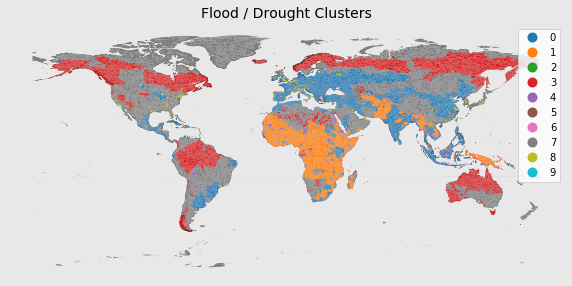

In [58]:
fig, ax = plt.subplots(figsize=(10,10), facecolor='#E8E8E8')
data.plot(ax = ax, column = 'floodrought_labels', legend=True, categorical = True)
ax.set_title("Flood / Drought Clusters", fontsize=14)
ax.set_axis_off()